## Observations and Insights

## Dependencies and starter code

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data_merge = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

study_data_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_summary = study_data_merge.groupby('Drug Regimen')['Tumor Volume (mm3)']
Drug_summary.agg({'Drug Regimen': ['mean', 'median', 'var', 'std','sem']})
Table                    

,Mean Tumor Voulume,Median Tumor Voulume,Tumor Volume Variance,Tumor Volume Stander Deviation,Tumor Volume Stander Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

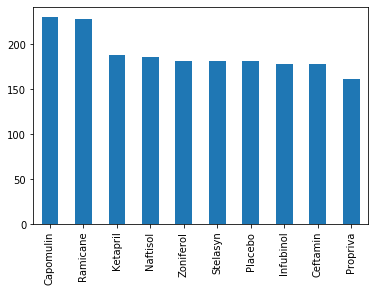

In [67]:
# Generate a bar plot showing number of data points for each treatmentregimen using pandas
amount_of_drugs = study_data_merge["Drug Regimen"].value_counts()
amount_of_drugs.plot.bar(x= ("Drug Regimen"),y=("Number of each Drug Used"))

Text(0, 0.5, 'Number of each Drug Used')

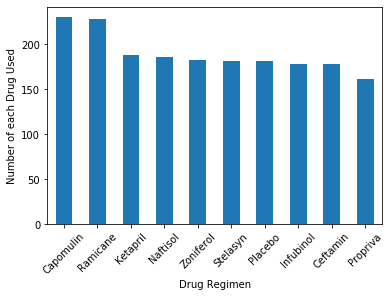

In [68]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
amount_of_drugs.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of each Drug Used")

## Pie plots

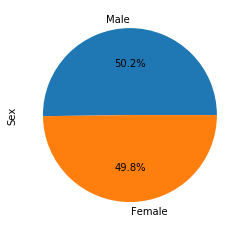

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = mouse_metadata.Sex.value_counts()
sex_counts.plot.pie(y = "Sex", autopct= "%1.1f%%")
plt.show()

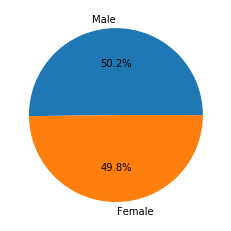

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = mouse_metadata.Sex.value_counts()
plt.pie(sex_counts, labels = sex_counts.index, autopct='%1.1f%%')
plt.show()

## Quartiles, outliers and boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
max_tumor = study_data_merge.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(study_data_merge,on=['Mouse ID','Timepoint'],how="left")
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

capomulin_lower = st.iqr(capomulin,interpolation='lower')
capomulin_higher = st.iqr(capomulin,interpolation='higher')
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < capomulin_lower) | (capomulin > capomulin_higher)]}")

ramicane_lower = st.iqr(ramicane,interpolation='lower')
ramicane_higher = st.iqr(ramicane,interpolation='higher')
print(f"Capomulin potential outliers: {ramicane.loc[(ramicane < ramicane_lower) | (ramicane > ramicane_higher)]}")

infubinol_lower = st.iqr(infubinol,interpolation='lower')
infubinol_higher = st.iqr(infubinol,interpolation='higher')
print(f"Capomulin potential outliers: {infubinol.loc[(infubinol < infubinol_lower) | (infubinol > infubinol_higher)]}")

ceftamin_lower = st.iqr(ceftamin,interpolation='lower')
ceftamin_higher = st.iqr(ceftamin,interpolation='higher')
print(f"Capomulin potential outliers: {ceftamin.loc[(ceftamin < ceftamin_lower) | (ceftamin > ceftamin_higher)]}")

Capomulin potential outliers: 19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64





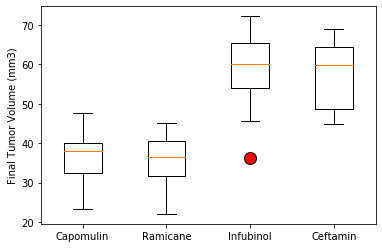

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

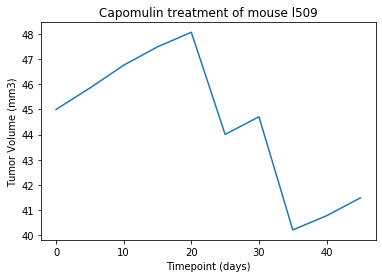

In [73]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = study_data_merge.loc[study_data_merge['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

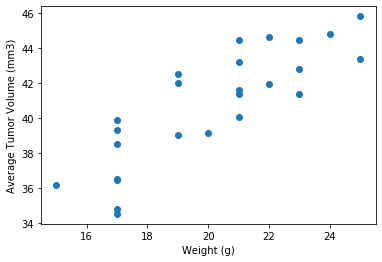

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = study_data_merge.loc[study_data_merge['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()